In [2]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas

red_wines = pd.read_csv("winequality-red.csv", sep=";")
red_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
red_wines.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [5]:
red_wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Create Target Column based on quality rating of 5 or lower = bad (0) and 6 or higher = good (1)
red_wines['target'] = np.where(red_wines['quality']<=5,0,1)

In [11]:
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [13]:
red_wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


In [14]:
# Assign X & y

X = red_wines.drop(["quality", 'target'], axis=1)
y= red_wines.target

In [15]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, stratify=y)

In [16]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
540,9.2,0.59,0.24,3.3,0.101,20.0,47.0,0.99880,3.26,0.67,9.6
1205,7.2,0.36,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0
709,9.7,0.31,0.47,1.6,0.062,13.0,33.0,0.99830,3.27,0.66,10.0
620,8.3,0.54,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4
1316,5.4,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5


In [17]:
X_scaler= MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
classifier = LogisticRegression()

In [19]:
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(predictions)
print(classifier.classes_)

[0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1
 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1]
[0 1]


In [20]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7464553794829024
Testing Data Score: 0.74


In [21]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       186
           1       0.78      0.72      0.75       214

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



In [22]:
cm = confusion_matrix(y_test,classifier.predict(X_test_scaled))
print(cm)

[[141  45]
 [ 59 155]]


In [23]:
from sklearn.metrics import plot_confusion_matrix

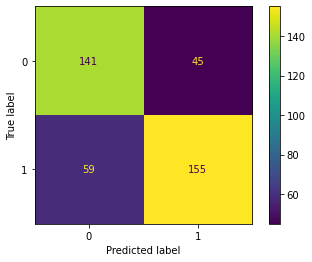

In [24]:
plot_confusion_matrix(classifier, X_test_scaled, y_test)

In [25]:
param_grid = {'C': [.01, 1, 10],
               'max_iter': [10,50,100,200,250,400],
               'penalty': ['elasticnet', 'l1', 'l2','none'],
               'dual': [True, False],
               'fit_intercept': [True, False],
               'class_weight': ['dict', 'balanced']
             }
grid_minmax = GridSearchCV(classifier, param_grid, verbose=3,)

In [26]:
grid_minmax.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)



[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_i

[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_interc

[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=Fal

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.742, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.738, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.762, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.742, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.732, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=Fals

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaco

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.762, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.742, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.732, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, clas

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.762, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.742, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.732, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.738, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.762, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.742, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.732, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_wei

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.746, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.738, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.762, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.742, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.732, total=   0.0s
[CV] C=0.01, class_weight=dict, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.667, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.642, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.654, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.633, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.615, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.746, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.746, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.762, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.738, total=   0.0s
[CV] C=0.01, class_weight=dict, du

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaco

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.633, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.615, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.746, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.746, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.762, total=   0.0s
[CV] C=0.01, class_weight=dic

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l1 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l1 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.667, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.642, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.736, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=na

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.736, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=na

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.736, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, 

[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total

[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balance

[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elastic

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.733, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.746, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.754, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.754, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.724, total=   0.0s
[CV] 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.738, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.762, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.750, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.724, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total= 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penal

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.724, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, p

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaco


[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.750, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.724, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticne

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.738, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.762, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.750, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.724, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.738, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.696, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.728, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.742, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.746, total=   0.0s
[CV] C

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.738, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.738, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.754, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.750, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.728, total=   0

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.738, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.696, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.728, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.738, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.738, total=   0.

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.692, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.721, total=   0.0s
[CV] C=0.01

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.728, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_it

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.728, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict

[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=1, 

[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, 

[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l1 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l1 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l1 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, ma

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=T

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.762, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.742, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.732, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.728, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.746, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.738, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.762, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.742, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.733, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l2

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.746, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.738, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.762, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.742, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.732, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=Fals

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.758, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.736, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.746, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.738, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.762, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.754, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.758, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.736, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.746, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.746, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=Fals

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.738, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.736, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weig

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.738, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.736, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, clas

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_

[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balance

[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_int

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.746, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.762, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.754, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.732, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.733, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, f

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.724, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.732, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.738, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.738, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.762, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.750, total=   0.0s
[CV] C=1, class_weight=ba

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.754, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.732, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.738, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.738, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.762, total=   0.0s
[CV] C=1, class_weight=balanc

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.729, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.738, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fi

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.754, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.750, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.728, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=  

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.738, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.754, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.750, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.728, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.750, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.728, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.738, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.738, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.754, total=   0.0s
[CV] C=1, class_weig

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.738, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.754, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.750, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.728, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.738, total=   0.0s
[CV] C=1, class_weight=balan

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True,

[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, d

[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, m

[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, c

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.742, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.732, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_int

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.746, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.742, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.732, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=Tru

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=Fal

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.742, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.732, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk


[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l1 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l1 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l1 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l1 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_ite

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.742, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.732, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.746, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.742, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.732, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_inte

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.733, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.742, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.758, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.750, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.732, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=Fal

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.736, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.746, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.736, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, d

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.742, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.758, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.750, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.732, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.746, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.736, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total= 

[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weig

[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=bal

[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, s

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.720, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.733, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.746, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.754, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.754, total=   0.0s
[CV] C=10, class_weight=b

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_C

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elastic

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.750, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.724, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV]

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaco

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.750, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.715, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_wei

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.724, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.750, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.724, total=   0.0s
[CV] C=10, cla

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.738, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.742, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.762, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.750, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.715, total=   0.0s
[CV] C=10, class_weight=balanced

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.750, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.724, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=  

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.746, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.758, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.754, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.728, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV]

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.750, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.758, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.750, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.720, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_we

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalt

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.754, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.750, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.728, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.750, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.758, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.750, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.720, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.738, total=   0.0s
[CV] C=10, class_we

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 1, 10],
                         'class_weight': ['dict', 'balanced'],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [10, 50, 100, 200, 250, 400],
                         'penalty': ['elasticnet', 'l1', 'l2', 'none']},
             verbose=3)

In [27]:
print(grid_minmax.best_params_)
print(grid_minmax.best_score_)



{'C': 0.01, 'class_weight': 'dict', 'dual': False, 'fit_intercept': False, 'max_iter': 50, 'penalty': 'none'}
0.7456136680613668


In [28]:
# Training Score
grid_minmax.score(X_train_scaled, y_train)

0.7489574645537949

In [29]:
# Testing Score
grid_minmax.score(X_test_scaled, y_test)

0.7375

got similar results with hyper tuning this model with MInMaxSCaler, will try another model